In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.svm import SVC

#1

##1A

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/GL AIML/Progress/Data/vehicle-1.csv')
df.shape

(846, 19)

In [ ]:
df.sample(10)

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
737,105,51.0,93.0,160.0,51.0,7,217.0,30.0,24.0,165,240.0,703.0,208.0,81.0,9.0,25.0,188.0,188,bus
230,85,35.0,47.0,110.0,55.0,3,117.0,57.0,17.0,122,136.0,203.0,139.0,89.0,5.0,9.0,180.0,184,van
510,86,43.0,70.0,126.0,56.0,6,148.0,46.0,19.0,145,166.0,317.0,171.0,86.0,6.0,9.0,179.0,182,bus
25,85,45.0,80.0,154.0,64.0,9,147.0,45.0,19.0,148,169.0,324.0,174.0,71.0,1.0,4.0,188.0,199,van
124,85,45.0,71.0,150.0,63.0,8,143.0,46.0,19.0,147,171.0,307.0,179.0,72.0,2.0,3.0,187.0,196,van
324,94,38.0,88.0,179.0,60.0,7,170.0,39.0,21.0,131,188.0,435.0,144.0,66.0,2.0,28.0,195.0,204,car
364,87,45.0,77.0,153.0,59.0,7,154.0,44.0,19.0,145,181.0,350.0,172.0,75.0,15.0,14.0,184.0,189,car
831,100,47.0,70.0,185.0,70.0,7,162.0,40.0,20.0,153,179.0,406.0,172.0,68.0,9.0,6.0,200.0,205,bus
836,87,45.0,66.0,139.0,58.0,8,140.0,47.0,18.0,148,168.0,294.0,175.0,73.0,3.0,12.0,188.0,196,van
833,92,46.0,83.0,154.0,56.0,6,160.0,41.0,20.0,148,185.0,382.0,184.0,71.0,10.0,5.0,186.0,191,car


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

##1B

In [ ]:
round(df.isnull().sum()/df.shape[0],2)

compactness                    0.00
circularity                    0.01
distance_circularity           0.00
radius_ratio                   0.01
pr.axis_aspect_ratio           0.00
max.length_aspect_ratio        0.00
scatter_ratio                  0.00
elongatedness                  0.00
pr.axis_rectangularity         0.00
max.length_rectangularity      0.00
scaled_variance                0.00
scaled_variance.1              0.00
scaled_radius_of_gyration      0.00
scaled_radius_of_gyration.1    0.00
skewness_about                 0.01
skewness_about.1               0.00
skewness_about.2               0.00
hollows_ratio                  0.00
class                          0.00
dtype: float64

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
compactness,846.0,93.678487,8.234474,73.0,87.00,93.0,100.0,119.0
circularity,841.0,44.828775,6.152172,33.0,40.00,44.0,49.0,59.0
distance_circularity,842.0,82.110451,15.778292,40.0,70.00,80.0,98.0,112.0
radius_ratio,840.0,168.888095,33.520198,104.0,141.00,167.0,195.0,333.0
pr.axis_aspect_ratio,844.0,61.678910,7.891463,47.0,57.00,61.0,65.0,138.0
max.length_aspect_ratio,846.0,8.567376,4.601217,2.0,7.00,8.0,10.0,55.0
scatter_ratio,845.0,168.901775,33.214848,112.0,147.00,157.0,198.0,265.0
elongatedness,845.0,40.933728,7.816186,26.0,33.00,43.0,46.0,61.0
pr.axis_rectangularity,843.0,20.582444,2.592933,17.0,19.00,20.0,23.0,29.0
max.length_rectangularity,846.0,147.998818,14.515652,118.0,137.00,146.0,159.0,188.0


In [ ]:
df.skew()

<ipython-input-81-9e0b1e29546f>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


compactness                    0.381271
circularity                    0.261809
distance_circularity           0.106585
radius_ratio                   0.394978
pr.axis_aspect_ratio           3.830362
max.length_aspect_ratio        6.778394
scatter_ratio                  0.607271
elongatedness                  0.047847
pr.axis_rectangularity         0.770889
max.length_rectangularity      0.256359
scaled_variance                0.651598
scaled_variance.1              0.842034
scaled_radius_of_gyration      0.279317
scaled_radius_of_gyration.1    2.083496
skewness_about                 0.776519
skewness_about.1               0.688017
skewness_about.2               0.249321
hollows_ratio                 -0.226341
dtype: float64

##1D

In [ ]:
(df.isnull().sum()>0)

compactness                    False
circularity                     True
distance_circularity            True
radius_ratio                    True
pr.axis_aspect_ratio            True
max.length_aspect_ratio        False
scatter_ratio                   True
elongatedness                   True
pr.axis_rectangularity          True
max.length_rectangularity      False
scaled_variance                 True
scaled_variance.1               True
scaled_radius_of_gyration       True
scaled_radius_of_gyration.1     True
skewness_about                  True
skewness_about.1                True
skewness_about.2                True
hollows_ratio                  False
class                          False
dtype: bool

In [ ]:
df.dtypes

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                           object
dtype: object

In [ ]:
for col in df.columns[df.isnull().any()]:
    df[col] = df[col].fillna(df[col]).median()

df.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

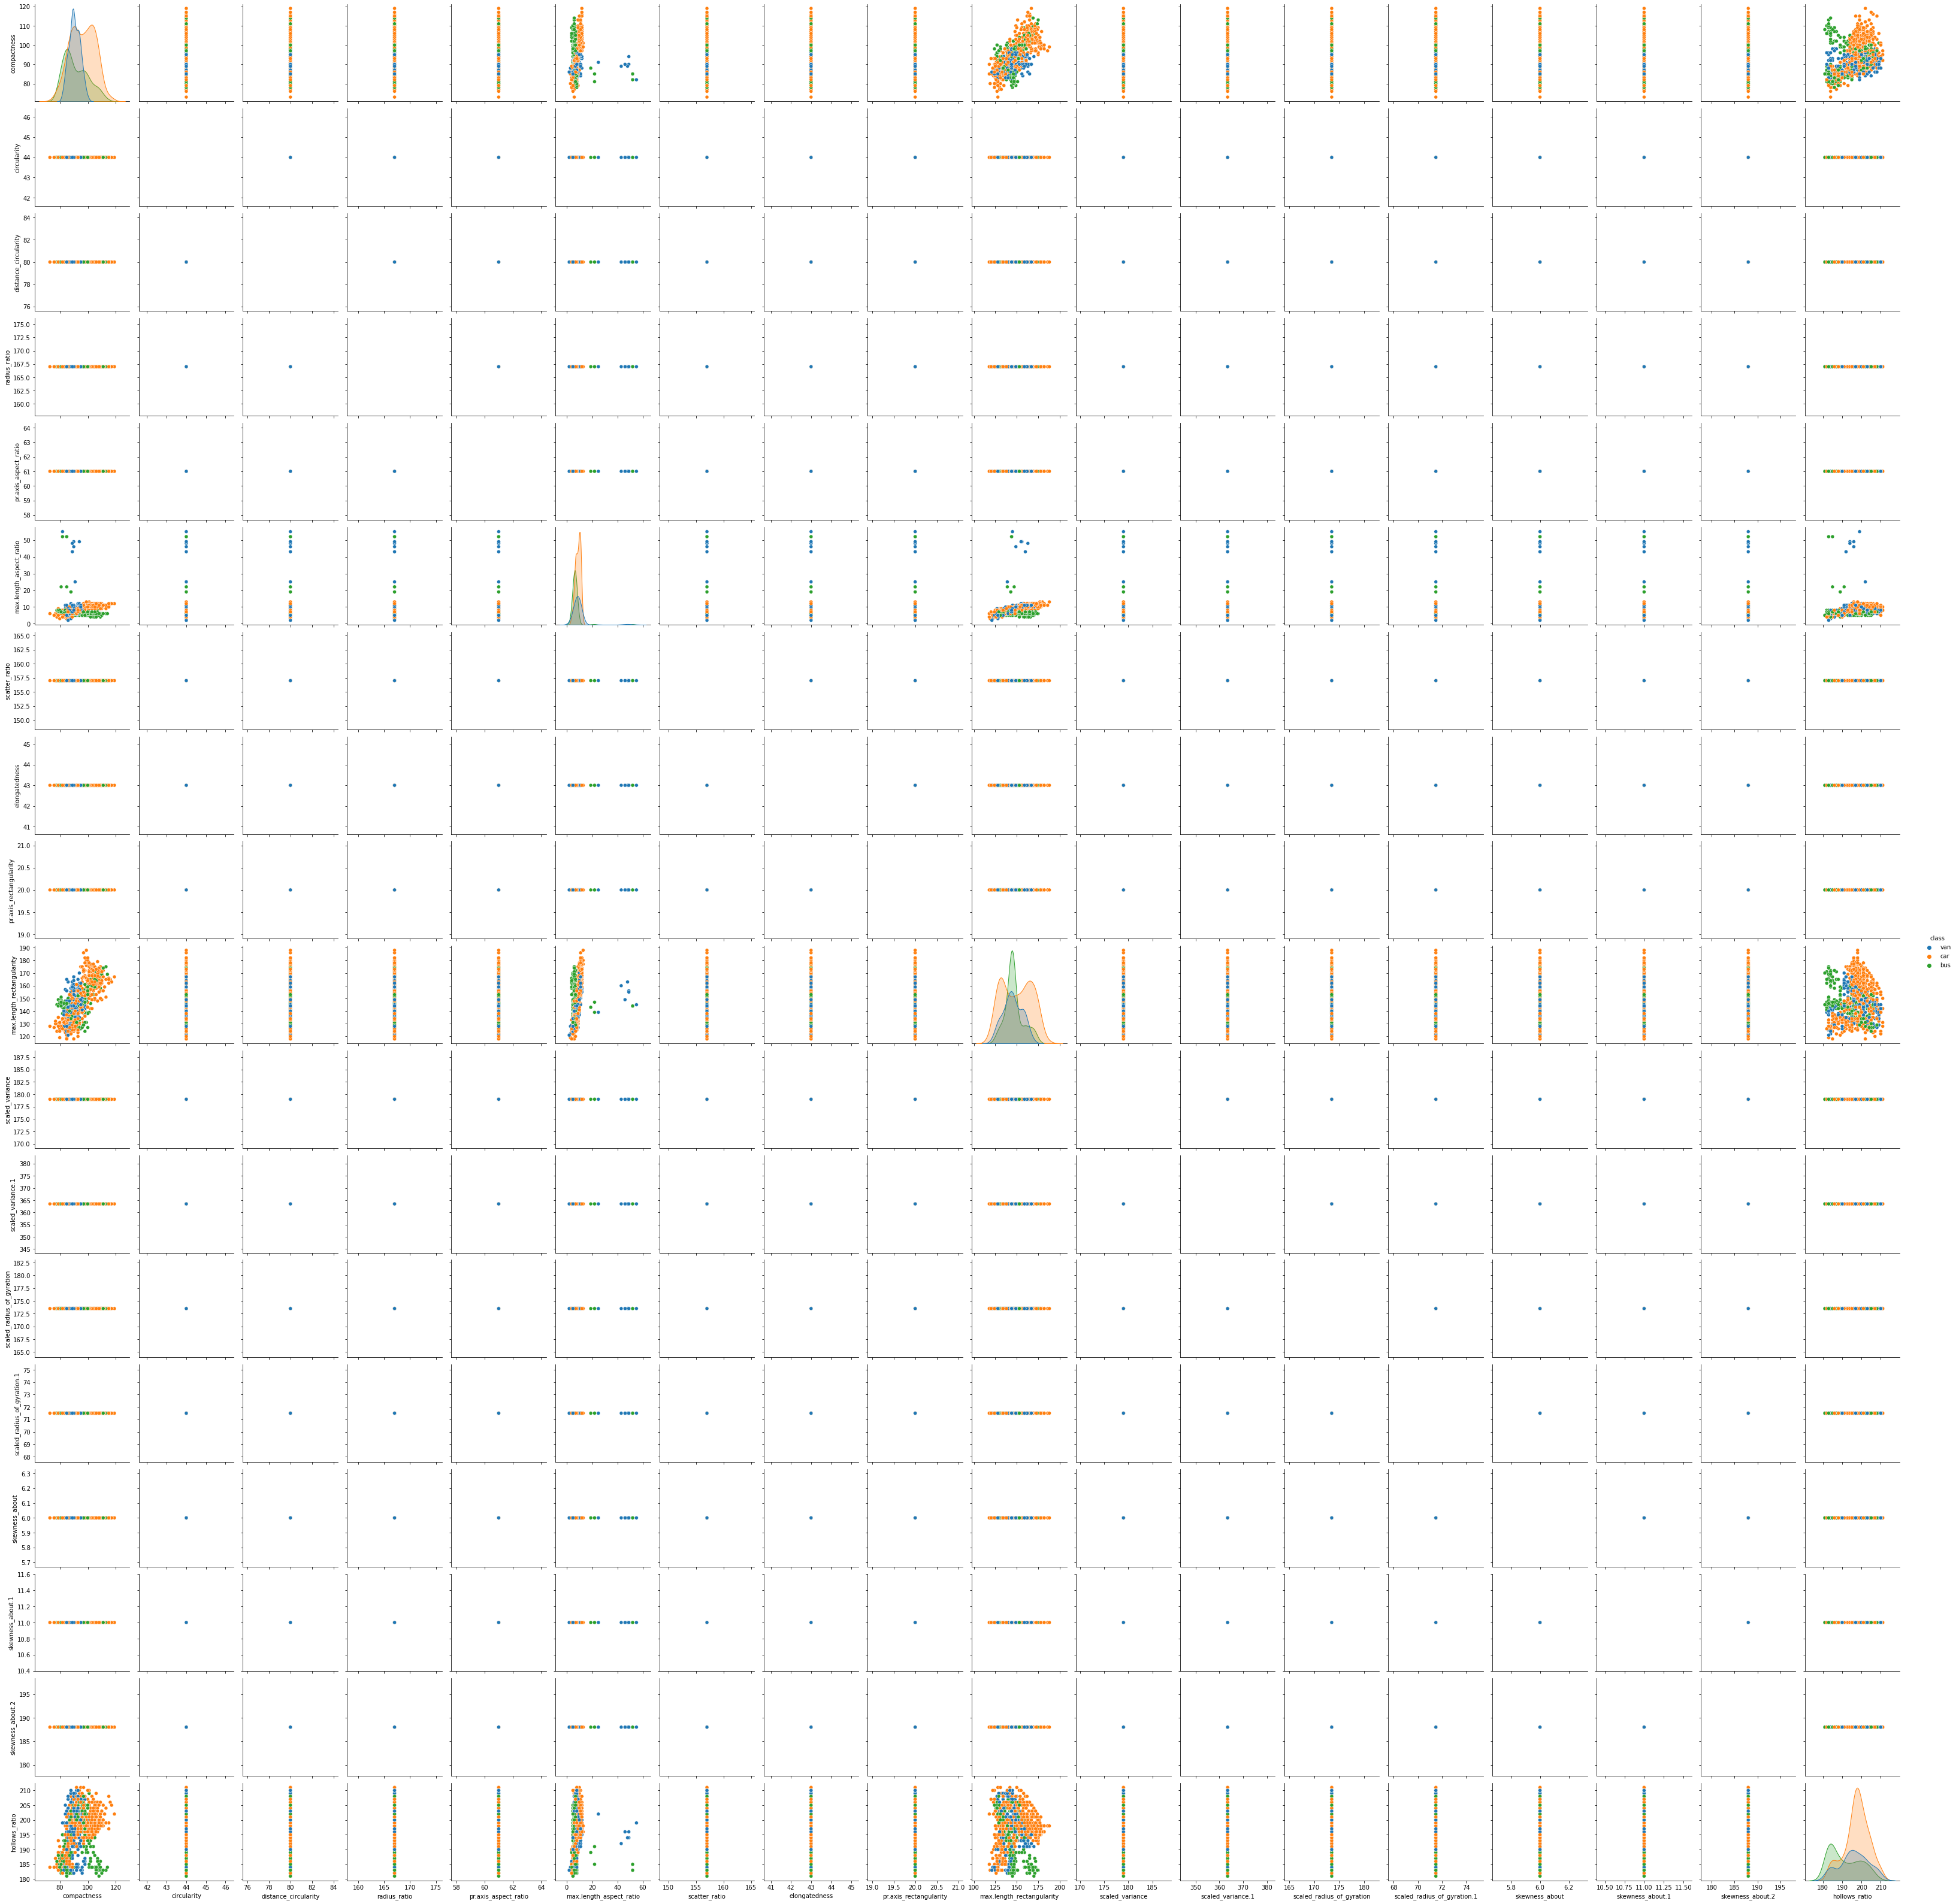

In [ ]:
sns.pairplot(df,diag_kind = 'kde',hue='class')

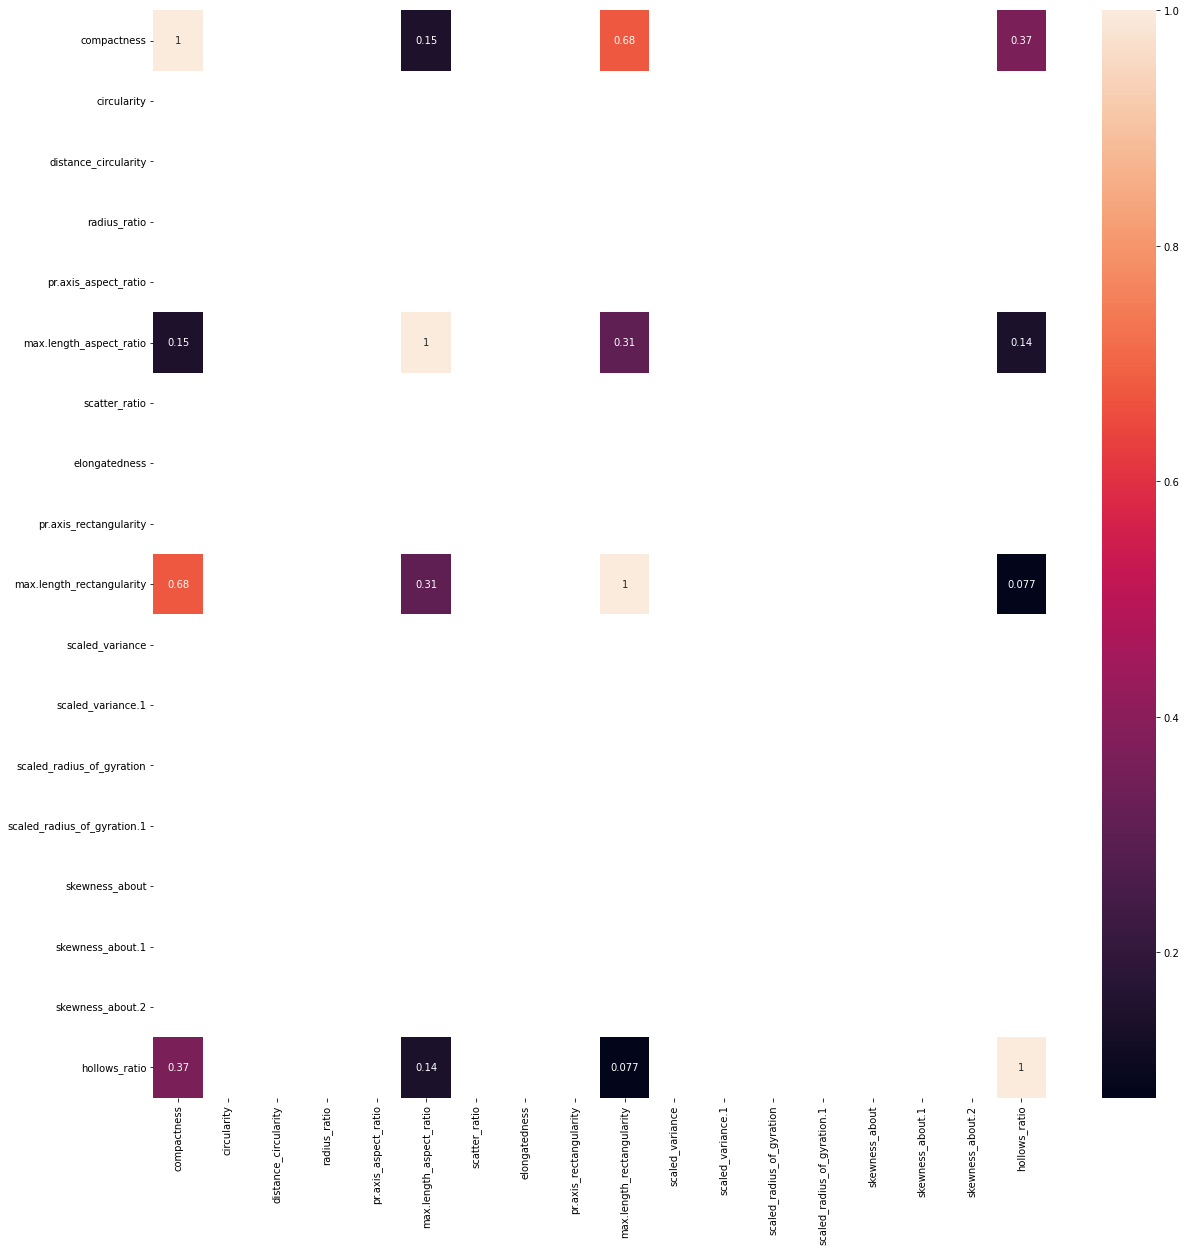

In [ ]:
fig, ax = plt.subplots(figsize=(20, 20))

sns.heatmap(df.corr(),annot = True)

plt.show()

In [ ]:
df.corr()[df.corr()>0.8]

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
compactness,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
circularity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
distance_circularity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
radius_ratio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pr.axis_aspect_ratio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max.length_aspect_ratio,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
scatter_ratio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
elongatedness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pr.axis_rectangularity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max.length_rectangularity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

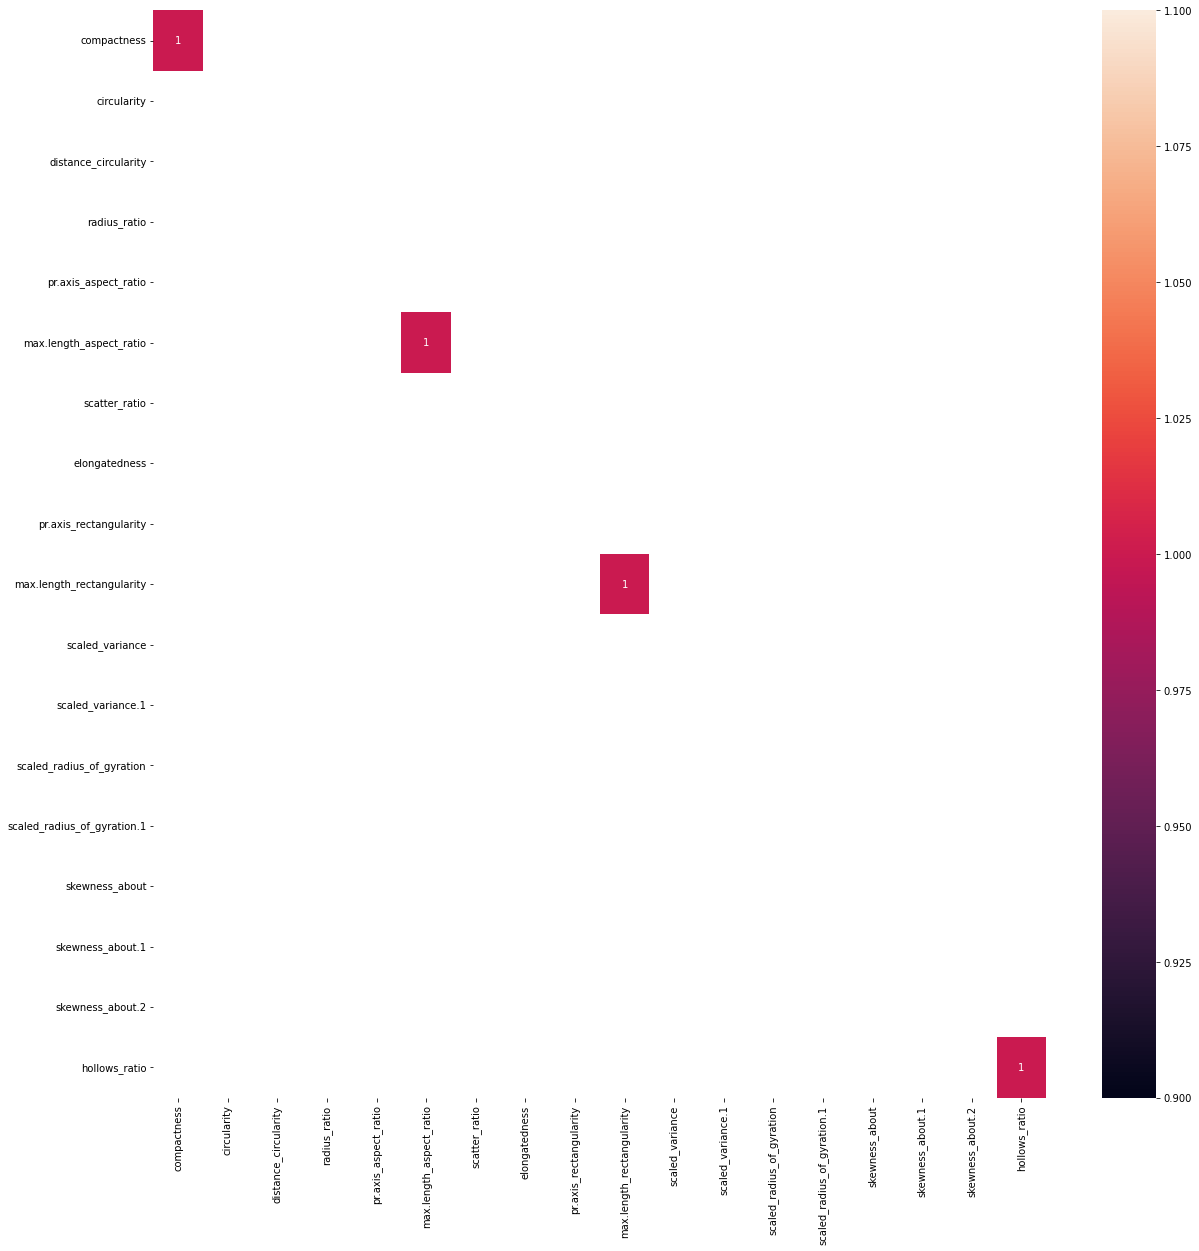

In [ ]:
fig, ax = plt.subplots(figsize=(20, 20))

sns.heatmap(df.corr()[df.corr()>0.8],annot=True)

In [ ]:
df['class'].value_counts()

car    429
bus    218
van    199
Name: class, dtype: int64

In [ ]:
df['class'].unique()

array(['van', 'car', 'bus'], dtype=object)

##1C

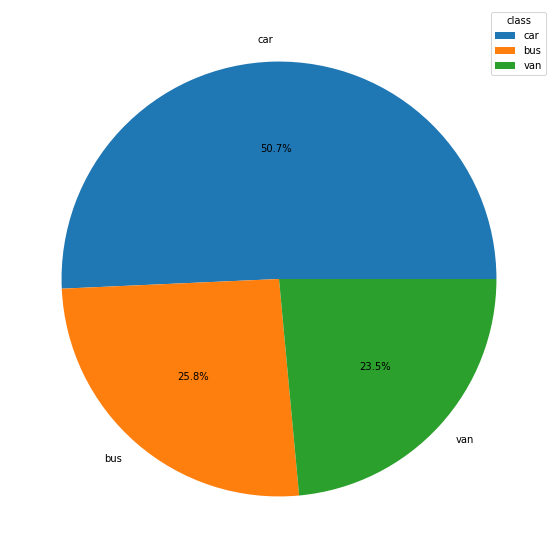

In [ ]:
fig,ax = plt.subplots(figsize=(10,10))
plt.pie(df['class'].value_counts(),labels = ['car', 'bus','van'],autopct='%1.1f%%')
plt.legend(title = 'class')
plt.show()

In [ ]:
df.duplicated().sum()

10

##2B

In [ ]:
scaler = StandardScaler()
scaledarr = scaler.fit_transform(df.iloc[:,:-1])
scaleddf = pd.DataFrame(scaledarr,columns = df.iloc[:,:-1].columns)
scaleddf.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,0.160580,0.0,0.0,0.0,0.0,0.311542,0.0,0.0,0.0,0.758332,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.183957
1,-0.325470,0.0,0.0,0.0,0.0,0.094079,0.0,0.0,0.0,-0.344578,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.452977
2,1.254193,0.0,0.0,0.0,0.0,0.311542,0.0,0.0,0.0,0.689401,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.049447
3,-0.082445,0.0,0.0,0.0,0.0,0.094079,0.0,0.0,0.0,-0.344578,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.529056
4,-1.054545,0.0,0.0,0.0,0.0,9.444962,0.0,0.0,0.0,-0.275646,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.699181


#2
##2A

In [ ]:
xtrain,ytrain,xtest,ytest= train_test_split(scaleddf,df.iloc[:,-1],test_size=0.3, random_state=4320)
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)

(592, 18) (592,) (254, 18) (254,)


In [ ]:
def model_eval (model,xtrain,xtest,ytrain,ytest):
    model = model.fit(xtrain,ytrain)
    tr_pred = model.predict(xtrain)
    print('\n-----------Train Result----------------')
    print('Classification Report is \n',classification_report(ytrain,tr_pred))
    print('Accuracy Score is \n',round(accuracy_score(ytrain,tr_pred),2)*100,'%')
    print('Confusion Matrix is \n',confusion_matrix(ytrain,tr_pred))
    te_pred = model.predict(xtest)
    print('\n-----------Test Result----------------')
    print('Classification Report is \n',classification_report(ytest,te_pred))
    print('Accuracy Score is \n',round(accuracy_score(ytest,te_pred),2)*100,'%')
    print('Confusion Matrix is \n',confusion_matrix(ytest,te_pred))

#3
##3A, 3B

In [ ]:
model_eval(SVC(random_state=4320),xtrain,ytrain,xtest,ytest)


-----------Train Result----------------
Classification Report is 
               precision    recall  f1-score   support

         bus       0.90      0.82      0.86       146
         car       0.75      0.90      0.82       298
         van       0.79      0.55      0.65       148

    accuracy                           0.79       592
   macro avg       0.81      0.76      0.77       592
weighted avg       0.80      0.79      0.78       592

Accuracy Score is 
 79.0 %
Confusion Matrix is 
 [[120  25   1]
 [ 10 267  21]
 [  4  63  81]]

-----------Test Result----------------
Classification Report is 
               precision    recall  f1-score   support

         bus       0.92      0.82      0.87        72
         car       0.80      0.95      0.87       131
         van       0.86      0.59      0.70        51

    accuracy                           0.84       254
   macro avg       0.86      0.78      0.81       254
weighted avg       0.85      0.84      0.83       254

Accuracy

##3C

In [ ]:
pca1 = PCA(n_components=10,random_state=4320).fit(scaledarr)
pca_out_arr = pca1.transform(scaledarr)
pca_out_df1 = pd.DataFrame(pca_out_arr,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10'])
pca_out_df1.sample(10)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
669,-1.577066,1.248252,-0.524262,-0.183286,1.734279e-15,-5.539851e-15,-9.530682e-15,1.325945e-30,-1.128323e-31,4.679151e-47
64,-0.230983,-0.352079,-0.143881,-0.039107,-3.748070e-16,1.194380e-15,2.010444e-15,-2.884800e-31,3.084467e-32,-1.361163e-47
289,-2.127854,0.573738,-0.232001,0.915745,7.676207e-16,-2.366419e-15,-4.352470e-15,6.613663e-31,-2.675657e-32,2.127892e-47
464,0.776012,-0.460289,-0.769472,-0.070598,-2.604729e-16,7.705029e-16,1.429062e-15,-2.516136e-31,1.356136e-32,-1.382055e-47
650,1.165788,0.436331,-0.464488,-0.487231,7.293761e-16,-2.408306e-15,-3.880469e-15,4.893471e-31,-6.936769e-32,1.948080e-47
403,0.798901,-1.419411,0.243181,-0.411305,-1.822432e-15,5.796687e-15,9.962676e-15,-1.413893e-30,1.241343e-31,-5.523355e-47
80,-1.053505,0.458879,-0.355912,-0.340756,7.064055e-16,-2.266923e-15,-3.907737e-15,5.314585e-31,-4.312798e-32,1.627016e-47
6,0.244920,-1.326918,-0.188573,0.062381,-1.552844e-15,4.950604e-15,8.424130e-15,-1.194308e-30,1.151751e-31,-5.002315e-47
159,-0.371536,-0.494939,-0.217410,-0.328287,-5.148220e-16,1.627091e-15,2.766709e-15,-4.077934e-31,4.085280e-32,-1.981153e-47
333,-1.678226,1.299097,-0.329297,0.201562,1.711493e-15,-5.435226e-15,-9.418166e-15,1.335824e-30,-1.077248e-31,4.879093e-47


In [ ]:
pca1.explained_variance_

array([1.93426908e+000, 9.47575896e-001, 8.84843248e-001, 2.38045504e-001,
       7.02363049e-063, 2.09880960e-064, 8.01076431e-065, 3.20612348e-096,
       2.51934394e-097, 8.88788333e-129])

In [ ]:
np.percentile(np.cumsum(pca1.explained_variance_),90)

4.004733727810652

In [ ]:
pca_out_df1.columns

Index(['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10'], dtype='object')

##3D, 3E

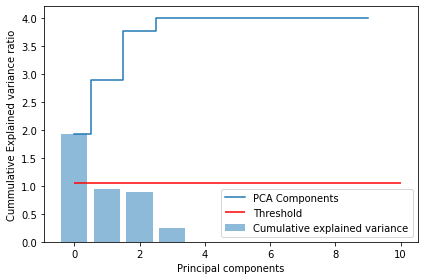

In [ ]:
plt.bar(range(0,len(pca_out_df1.columns)), pca1.explained_variance_,alpha=0.5, align='center', label='Cumulative explained variance')
plt.step(range(0,len(pca1.explained_variance_)), np.cumsum(pca1.explained_variance_), where='mid',label='PCA Components')
plt.hlines(y=np.percentile(pca1.explained_variance_,90),xmin=0,xmax=10,color='red',label='Threshold')
plt.ylabel('Cummulative Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

##3F

In [ ]:
pca2 = PCA(n_components=0.90,random_state=4320).fit(scaledarr)
pca_out_arr2 = pca2.transform(scaledarr)
pca_out_arr2

array([[ 0.72940466,  0.23365712,  0.04444413],
       [-0.21958864, -0.44171536,  0.42680923],
       [ 1.32801491,  0.20611486, -0.37440984],
       ...,
       [ 2.48883496,  0.17208049, -0.19036403],
       [-1.72771681, -0.58719008,  0.49225571],
       [-2.02666762, -0.0684753 , -0.10249533]])

In [ ]:
pca_out_df2 = pd.DataFrame(pca_out_arr2,columns=['PC1','PC2','PC3'])
pca_out_df2.sample(10)

,PC1,PC2,PC3
795,-1.936459,1.142752,-0.339244
656,-1.189014,0.161333,0.135520
293,-0.338466,-0.957653,0.369828
365,2.146036,-0.057571,-0.327160
616,-0.096727,-1.457006,0.572863
340,-0.996847,-0.450199,0.186694
265,-1.611452,0.994101,-0.001197
382,-1.493771,1.007585,-0.064779
146,1.305687,0.469324,-0.111342
773,-1.236735,0.661476,-0.175395


In [ ]:
xtrain,ytrain,xtest,ytest= train_test_split(pca_out_df2,df.iloc[:,-1],test_size=0.3, random_state=4320)
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)

(592, 3) (592,) (254, 3) (254,)


In [ ]:
ytrain.head()

,PC1,PC2,PC3
382,-1.493771,1.007585,-0.064779
481,1.900441,0.601792,-0.423524
350,0.539960,-0.502884,-0.136093
327,-0.842286,0.042495,-0.287553
98,0.433711,-0.700244,0.271581


##3G,3H

In [ ]:
model_eval(SVC(random_state=4320),xtrain,ytrain,xtest,ytest)


-----------Train Result----------------
Classification Report is 
               precision    recall  f1-score   support

         bus       0.87      0.75      0.80       146
         car       0.71      0.93      0.81       298
         van       0.79      0.41      0.54       148

    accuracy                           0.76       592
   macro avg       0.79      0.70      0.72       592
weighted avg       0.77      0.76      0.74       592

Accuracy Score is 
 76.0 %
Confusion Matrix is 
 [[109  37   0]
 [  5 277  16]
 [ 11  76  61]]

-----------Test Result----------------
Classification Report is 
               precision    recall  f1-score   support

         bus       0.84      0.72      0.78        72
         car       0.75      0.96      0.84       131
         van       0.92      0.43      0.59        51

    accuracy                           0.79       254
   macro avg       0.84      0.71      0.74       254
weighted avg       0.81      0.79      0.77       254

Accuracy

Insights


*   The variance is high
*   the recall for van is low i.e the data is biased



#4
##4A

In [ ]:
param_grid_ = {
                'C':[1.0,1.5,0.5,2,2.5], 
              'kernel':('rbf', 'sigmoid'),
              'max_iter':[-1,1], 
              'break_ties':[True,False]
}

In [ ]:
gdcv = GridSearchCV(estimator=SVC(random_state=4320),param_grid=param_grid_)
gdcv.fit(xtrain,xtest)

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your

GridSearchCV(estimator=SVC(random_state=4320),
             param_grid={'C': [1.0, 1.5, 0.5, 2, 2.5],
                         'break_ties': [True, False],
                         'kernel': ('rbf', 'sigmoid'), 'max_iter': [-1, 1]})

##4B

In [ ]:
gdcv.best_params_

{'C': 2, 'break_ties': True, 'kernel': 'rbf', 'max_iter': -1}

In [ ]:
gdcv.best_score_

0.7280729240848882

##4C

In [ ]:
model_eval(SVC(C=2,break_ties=True,max_iter = -1,kernel = 'rbf',random_state=4320),xtrain,ytrain,xtest,ytest)


-----------Train Result----------------
Classification Report is 
               precision    recall  f1-score   support

         bus       0.91      0.75      0.82       146
         car       0.72      0.91      0.80       298
         van       0.78      0.49      0.60       148

    accuracy                           0.77       592
   macro avg       0.80      0.72      0.74       592
weighted avg       0.78      0.77      0.76       592

Accuracy Score is 
 77.0 %
Confusion Matrix is 
 [[109  36   1]
 [  7 272  19]
 [  4  72  72]]

-----------Test Result----------------
Classification Report is 
               precision    recall  f1-score   support

         bus       0.89      0.71      0.79        72
         car       0.75      0.96      0.84       131
         van       0.93      0.53      0.67        51

    accuracy                           0.80       254
   macro avg       0.86      0.73      0.77       254
weighted avg       0.83      0.80      0.79       254

Accuracy

Insights


*   the variance remains the same
*   the accuracy improved
* the recall for class van is improved



#5
##5A

PCA Assumptions


*   The data is linear
*   correlation bw features
*  the data is standardized
* there are no missing values
* there are no outliers



##5B

Advantages of PCA


*   Dimentionality reduction
*   not compute heavy

Disadvantages of PCA

* Trade off between Information gain and dimensionality reduction
 



In [ ]:
%%shell
jupyter nbconvert --to html //'/content/drive/MyDrive/Colab Notebooks/Unsupervised Mini Project Part B.ipynb'

[NbConvertApp] Converting notebook ///content/drive/MyDrive/Colab Notebooks/Unsupervised Mini Project Part B.ipynb to html
[NbConvertApp] Writing 339569 bytes to ///content/drive/MyDrive/Colab Notebooks/Unsupervised Mini Project Part B.html
